In [23]:
%cd F:\CDAC-DBDA\Brain Tumer Project

F:\CDAC-DBDA\Brain Tumer Project


In [24]:
pwd

'F:\\CDAC-DBDA\\Brain Tumer Project'

In [25]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [26]:
import keras
import tensorflow as tf
tf.compat.v1.set_random_seed(2)

In [27]:

model = tf.keras.Sequential([   #tf.keras.models.Sequential
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(200, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(300, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
   
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout(0.1, seed=2),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.2, seed=2),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('No') 
    # and 1 for the other ('Yes')
    tf.keras.layers.Dense(2, activation='softmax')  
])


In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 200)       180200    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 200)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 300)       540300    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 300)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 86700)            

In [29]:

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics = ['acc'])

In [33]:
train_dir = "F:\CDAC-DBDA\Brain Tumer Project\Data"
validation_dir = "F:\CDAC-DBDA\Brain Tumer Project\Data"
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


In [34]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

Found 255 images belonging to 2 classes.


In [35]:
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


Found 255 images belonging to 2 classes.


In [36]:

history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=50,
                              epochs=4,
                              validation_steps=50,
                              verbose=1)

Epoch 1/4
50/50 [==============================] - 258s 5s/step - loss: 2.1028 - acc: 0.7061 - val_loss: 0.5248 - val_acc: 0.7624
Epoch 2/4
50/50 [==============================] - 272s 5s/step - loss: 0.4193 - acc: 0.8437 - val_loss: 0.1884 - val_acc: 0.9208
Epoch 3/4
50/50 [==============================] - 264s 5s/step - loss: 0.2298 - acc: 0.9143 - val_loss: 0.0511 - val_acc: 0.9848
Epoch 4/4
50/50 [==============================] - 276s 6s/step - loss: 0.0653 - acc: 0.9796 - val_loss: 0.0416 - val_acc: 0.9878


In [60]:

#from keras.models import load_model
#model = load_model('brain.h5')
import cv2
import numpy as np

img = cv2.imread('yes.png',1)

img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])
#print(classes)

classes = model.predict_classes(img)

if classes==1:
    print("Has a Brain Tumor.")
else:
    print("No Brain Tumor Detected.")

Has a Brain Tumor.


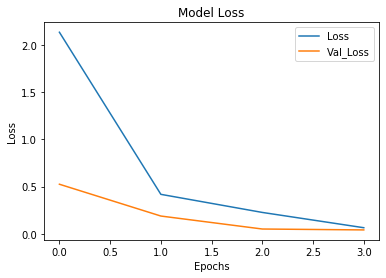

In [56]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Loss', 'Val_Loss'])
plt.show()


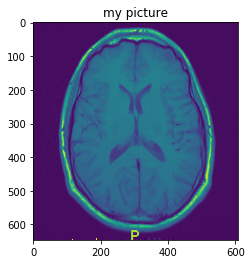

In [57]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('yes.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title('my picture')
plt.show()